1. Train model on the given dataset
2.To take images from the user and identify the gesture
3.Predict the result
4.To display

In [1]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import SimpleRNN, Flatten, TimeDistributed, LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
dataset_train = pd.read_csv('../Sign-Language-to-Text-Conversion/Dataset/sign_mnist_train.csv')
dataset_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
dataset_test = pd.read_csv('../Sign-Language-to-Text-Conversion/Dataset/sign_mnist_test.csv')
dataset_test.head()

c:\users\aakriti mishra\documents\nordic\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,2

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [4]:
print('Number of images in the training set: {}'.format(dataset_train.shape[0]))
print('Number of images in the test set: {}'.format(dataset_test.shape[0]))

d = int((dataset_train.shape[1] - 1)**0.5)
print('Shape of the images: {} x {}'.format(d,d))

Number of images in the training set: 27455
Number of images in the test set: 14347
Shape of the images: 28 x 28


In [5]:
labels = dataset_train['label']

In [6]:
dataset_train.drop('label', axis = 1, inplace = True)
print(dataset_train.shape)

(27455, 784)


In [7]:
x_train = dataset_train.values.reshape(dataset_train.shape[0],28,28,1)

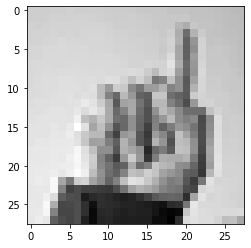

In [13]:
plt.imshow(x_train[9].reshape(28,28), cmap='gray')

In [9]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels)
print(labels.shape)

(27455, 25)


In [10]:
y_train=labels

In [11]:
# Normalize Dataset
x_train = x_train / 255.0
print(x_train.shape)

(27455, 28, 28, 1)
